In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

folder_path = 'drive/MyDrive/Day-1/Titanic/titanic_datasets/'

print('Files in this folder:', os.listdir(folder_path))

Files in this folder: ['train.csv', 'test.csv']


In [ ]:
titanic_df = pd.read_csv(folder_path+os.listdir(folder_path)[0])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Survived']

# Filtering for relevant features
titanic_df = titanic_df[features]
# Shuffle the dataframe
titanic_shuffled_df = titanic_df.sample(frac=1)

# Encode sex feature (1 female, 0 male)
sex = [1 if i == 'female' else 0 for i in titanic_shuffled_df.Sex.values]
titanic_shuffled_df['Sex'] = sex

titanic_shuffled_df = titanic_shuffled_df.dropna()

# Train/test index
train_test_index = int(titanic_shuffled_df.shape[0]*0.8)

# Create train and test 
train_df = titanic_shuffled_df.iloc[:train_test_index]
test_df = titanic_shuffled_df.iloc[train_test_index:]

# Check final shapes
print('Train dataset shape:', train_df.shape)
print('Test dataset shape:', test_df.shape)

Train dataset shape: (571, 5)
Test dataset shape: (143, 5)


In [ ]:
train_df.head()

,Pclass,Sex,Age,Fare,Survived
399,2,1,28.0,12.6500,1
742,1,1,21.0,262.3750,1
22,3,1,15.0,8.0292,1
652,3,0,21.0,8.4333,0
842,1,1,30.0,31.0000,1


In [ ]:
X_train = train_df.values[:, :-1]
Y_train = train_df.values[:, -1:]

X_test = test_df.values[:, :-1]
Y_test = test_df.values[:, -1:]


In [ ]:
# Defining the model
model = tf.keras.models.Sequential()

# Since we're using a vector to add, the shape is (size, ) rather than just (size)
model.add(tf.keras.Input(shape='____'))

# Select the output and the corresponding activation function
model.add(tf.keras.layers.Dense('____', activation='____'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model, define loss (binary_crossentropy, categorical_crossentropy) for binary problems and any default optimizer (adam, sgd, adadelta...)
model.compile(loss='____', optimizer='____', metrics=['accuracy'])

history = model.fit(X_train, Y_train,validation_split = '____', epochs='____', batch_size='____', verbose=0)

In [ ]:
# evaluate the model
loss_train, acc_train = model.evaluate(X_train, Y_train, verbose=0)
print('Train Accuracy: %.3f' %acc_train)
print('Train Loss: %.3f' %loss_train)

loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' %acc_test)
print('Test Loss: %.3f' %loss_test)

Train Accuracy: 0.786
Train Loss: 0.462
Test Accuracy: 0.762
Test Loss: 0.500


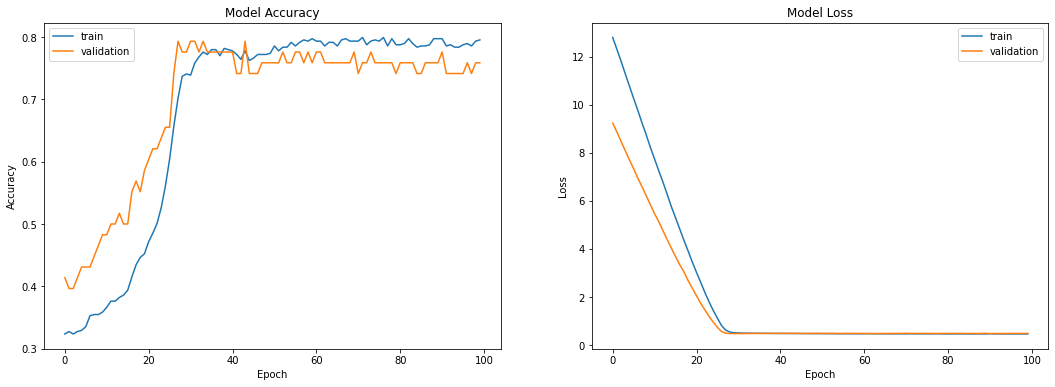

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))

# Left plot (Accuracy)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.title.set_text('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'validation'])


# Right plot (Loss)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.title.set_text('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'validation'])


This time we've created this **perceptron** using layers from tensorflow since makes sense to have a brief contact with the framework in a simple example. <br>
Moreover, **scikit-learn** already has a perceptron-class implemented to perform exactly the same operation without using tensorflow.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

# Build our perceptron fixing the randomness
p = Perceptron(random_state=42)

# Training it with the same data
p.fit(X_train, Y_train)

# Create predictions for evaluation
predictions_train = p.predict(X_train)
predictions_test = p.predict(X_test)

# Comparing results
train_score = accuracy_score(predictions_train, Y_train)
print("Train accuracy: %.3f" %train_score)
test_score = accuracy_score(predictions_test, Y_test)
print("Test accuracy: %.3f" %test_score)

Train accuracy: 0.694
Test accuracy: 0.657
